<a href="https://colab.research.google.com/github/ColeTKrause/MAT421/blob/main/ModuleH_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinary Differential Equations

### References
**Chapter 22: Python Numerical Methods** \
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.01-ODE-Initial-Value-Problem-Statement.html

## Problem Statement
### Section 22.1

An **Ordinary Differential Equation** is a **differential equation** in which the independent variable $x$ and all of its derivative take place in a single dimmension. For an arbitrary function $F$, we use the mathematical notation to denote and ODE: \
$F(x,f(x),\frac{df(x)}{dx},\frac{d^2f(x)}{dx^2},...,\frac{d^{n-1}f(x)}{dx^{n-1}}) = \frac{d^nf(x)}{dx^n}$ \
Here, $n$ deontes the order of the derivative. \
\
A common example for an ODE is the swinging pendulum example from physics courses. Here $l$ is the length of the pendulum, $g$ is gravitiy, $m$ is the mass of the weight, and $Θ$ is the angle from the $y$ axis. An ordinary differential equation representation of this problem is as follow: \
$ml\frac{d^2Θ(t)}{dt^2}=-mgsin(Θ(t))$
\
\
A **Partial Differential Equation** is a general form of a differential equation where $x$ is a vector of the independent variables $x_1, x_2,...,x_m$. It is very common to use linear algebra notation for PDE's given the presence of vectors and matrices in differential equations. PDE's are not constrained to a single dimension. \
\
A common exmple for a PDE is the diffusion of heat in a room from physics courses. Here $t$ is time, $x,y,z$ represent 3D coordinates. The partial differential equation representation from this problem is as follows: \
$\frac{∂u(t,x,y,z)}{∂t}=α(\frac{∂u(t,x,y,z)}{∂x}+\frac{∂u(t,x,y,z)}{∂y}+\frac{∂u(t,x,y,z)}{∂z})$ \
Note $α$ repsents thermal diffusion constant. \
\
Differential equations often have many solutions, and they can be hard to find at times. The term $g(x)$ represents the **general solution** to a given differential equation. The term $p(x)$ represents a **particular solution**, and $n$ represents the know values in the solution. For a particular to solution to exist, it must satisfy the following conditions: \
$p^{(j)}(x_i)=p_i$ \
Where $p^{(j)}$ is the jth derivative for $(j,x_i,p_i)$. Further for an **intial value** for and ODE of order $n$, there must be known solutions for the 0th to the (n-1)th derivative. Mathematically: $x=0,f(0),f'(0),f''(0),...,f^{n-1}(0)$ \
\
Now the main question, why does an analytical solution for an ODE matter? Considering the pendulum swing example. It is clear there are no explicit solution when the angles are large. The general solution only works to create a decently accurate solution when the angles are very small. Hence the need to be able to approximate accurately without incurring very large computational cost.

## Reduction of Order
### Section 22.2

The most common numerical methods for solving differential equations run on the assumption they are solving first order differential equations. Thus in order to expand the functionaltiy of the solvers, a **reduction of order** will take a differential equation with a **state** vector $S(t)$ as a collection of all the dependent variables at time $t$. Mathematically this is determined as: \
$f^{(n)}(t)=F(t,f(t),f'(t),...,f^{(n-1)}(t))$ \
to a state vector: (Note a comma denotes a new row in the vector) \
\
$S(t)=[f(t),f'(t),...,f^{(n-1)}(t)]$ \
Then taking the derivative: \
\
$\frac{dS(t)}{dt}=[f'(t),f''(t),...,f^{(n)}(t)=F(t,f(t),f'(t),...,f^{(n-1)}(t))]=[S_2(t),S_3(t),...,F(t,S_1(t),S_2(t),...,S_{n-1}(t))]$ \
where $S_i(t)$ is the $i^{th}$ element of $S(t)$\
\
This representation allowed us to turn an nth order ODE into n first order ODEs, in which they share the same terms, ie they are **coupled** together. \
\
Another very popular model represented by an ODE is a predator prey model. One such example is to consider the population of rabbits $r$ and wolves $w$ at time $t$. The mathematical formual is as follows: \
$\frac{dr(t)}{dt}=7r(t)-3w(t)$ and $\frac{dw(t)}{dt}=r(t)+2w(t)$ \
Using $S(t)$ notation and linear algebra matrices yields the following: \
\
$S(t)=[r(t), w(t)]$ and $\frac{dS(t)}{dt}=[7 \space -3, 1 \space \space 2]$

## Eurler Method
### Section 22.3

The **Explicit Eurler Formula** allows for the computation of an approximate value for the state $S(t_{j+1})$ given the intial state function $S(t)$. The method uses the following formula for approximation: \
$S(t_{j+1})=S(t_j)+(t_{j+1}-t_j)\frac{dS(t_j)}{dt}$ \
or in a reduced notation as: \
$S(t_{j+1})=S(t_j)+hF(t_j,S(t_j))$ \
\
The function starts from a given value $S_0=S(t_0)$ and then integrates all the necessary states up to $S(t_j)$ as mentioned in the above section with the state vector. The function is very simple as it relies on the intuition behind differentiation. Here the $h$ serves as the distance for "pointing" in the correct direction of higher order derivative. Similar to the definition of a derivative, as $h$ because smaller, the accuracy becomes greater, getting closer to the exact solution. In computational terms, this servers as an interative approach to approximating the exact solution. The program starts at the intital state $S_0$ and takes steps of size $h$ towards the next state at each iteration. \
\
**Example 1** \
Use the Explicit Eurler Formula to approximate $\frac{df(t)}{dt}=2e^{-2t}$ with initial condition $f_0=-1$ and exact solution $f(t)=-e^{-2t}$

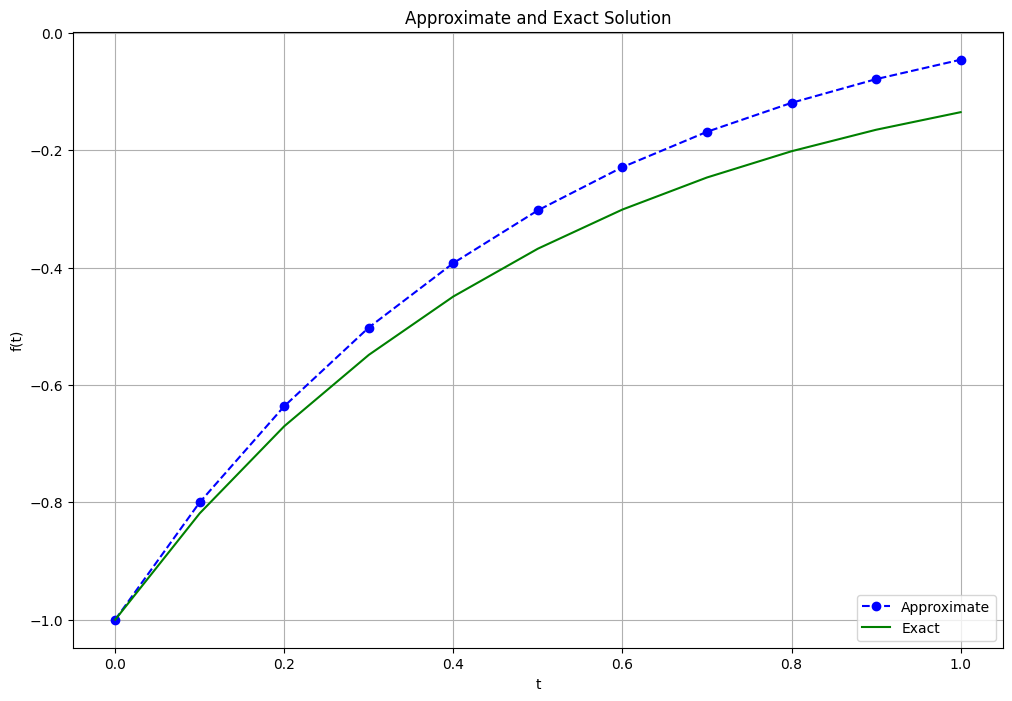

In [3]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt

# define function and parameters
f = lambda t, s: 2*np.exp(-2*t) # ODE
h = 0.1 # step size
t = np.arange(0, 1 + h, h)
s0 = -1 #initial conidtion

# Explicit Eurler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
  s[i+1] = s[i]+ h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t,s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-2*t), 'g', label='Exact')
plt.title('Approximate and Exact Solution')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

As mentioned above, $h$ or the stepsize in the program represents the accuracy. The smaller the stepsize, the closer each approximation through the Explicit Euler Formual and the closer the function gets to the exact solution.

<Figure size 640x480 with 0 Axes>

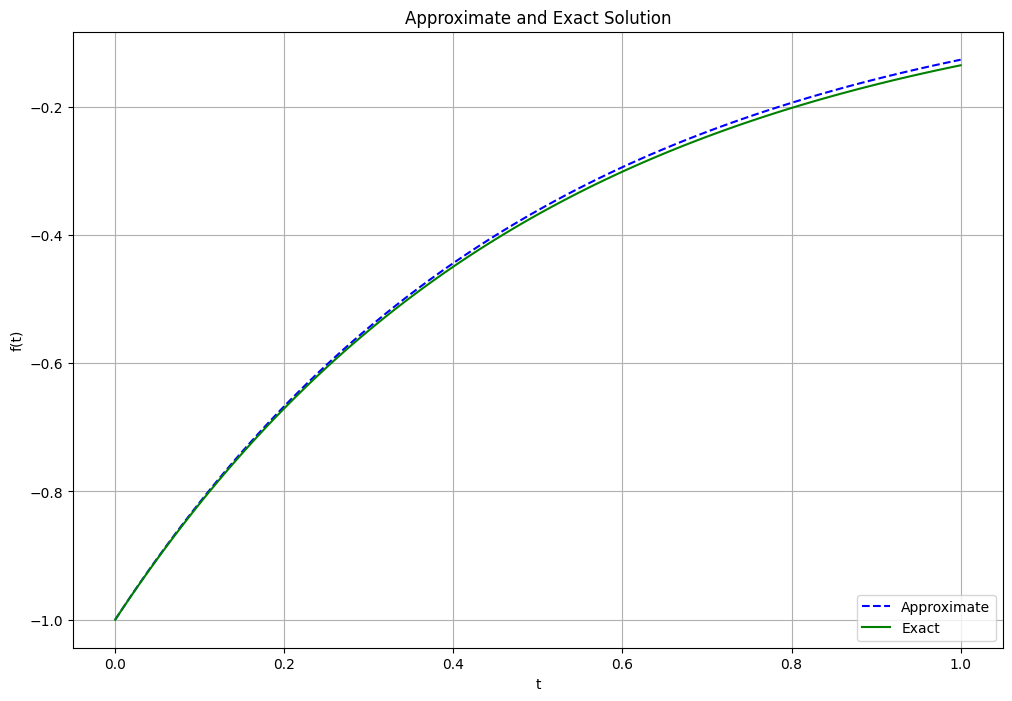

In [5]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt

# define function and parameters
f = lambda t, s: 2*np.exp(-2*t) # ODE
h = 0.01 # step size
t = np.arange(0, 1 + h, h)
s0 = -1 #initial conidtion

# Explicit Eurler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
  s[i+1] = s[i]+ h*f(t[i], s[i])
plt.clf()
plt.figure(figsize = (12, 8))
plt.plot(t,s, 'b--', label='Approximate')
plt.plot(t, -np.exp(-2*t), 'g', label='Exact')
plt.title('Approximate and Exact Solution')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Furthermore, the Eurler Formula can be expanded for further functionality. The **Implicit Eurler Formula** can be derived by taking the linear approximation of $S(t)$ around $t_{j+1}$ and computing it around $t_j$. The mathematical formula is as follows: \
$S(t_{j+1})=S(t_j)+hF(t_{j+1},S(t_{j+1}))$ \
\
The **Trapezoidal Formula** is found by taking the average of the Explicit and Implicit Euler Formulas: \
$S(t_{j+1})=S(t_j)+\frac{h}{2}(F(t_j,S(t_j))+F(t_{j+1},S(t_{j+1})))$ \
\
At first glace this formula doesn't make much sense as it requires to make an approximation with a value we are suppose to provide! However, when the problem is linear, they can be used to solve intial value problems.